# Introduction :

**Grover's Algorithm** is most well-known algorithm of Quantum Computing. It is one of the best ways to represent the Quantum-Supremacy over Classical Computing. Utilising the power of Quantum Computing in truly innovative ways, it creates a significant speed-up.

Even though the **Deutsch-Jozsa** and **Bernstein-Vazirani** are limited to theoritical applications, **Grover's** algorithm can be used for practical applications. Grover's algorithm can also be sometimes referred as **Grover's Search**.

# Problem :

Consider you as an **user** or **contestant** sitting opposite to **host**.

***HOST :*** I have a deck of cards on table. All of them are fair cards and well-shuffled so there is no way of telling which card is at what position. 

- You have to pick any card and give it to me.

- I am currently holding a particlular card from a differnet deck. Lets say *Diamond-Queen*. But i won't tell you what card i am holding.

- You have to pick any card from the deck given to you. If you have gave me any card which isn't *Diamond-Queen* i will tell you it is wrong.

- But if you have picked the correct one, then you are won!!!.

# Classical Solution :

It is a random guessing game. Let us try to implement this as an algorithm for a circuit.

- Let us consider that the input is the card which we give it to the host, then host checks it with his card.

- The input domain is deck of cards - all possible inputs, out of which only one is correct.

- Output will be th host's answer to our card. **YES** $\implies$ if matched with host's card. **NO** $\implies$ if it doesn't.

- Now the Oracle will be **Comparision** performed by th host with User's card.

This circuit isn’t too difficult to imagine — we just have to link these together in their logical flow.

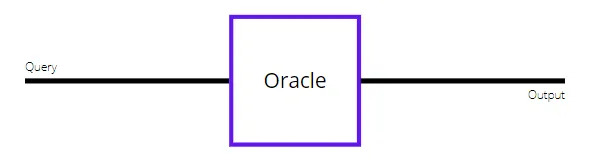

## Classical Algorithm :

As it is a Random guessing Game it makes the classical algorithms complex. We have **Binary search** to perform these kind of searchings. But the deck of cards which user have is completely shuffled and input domain is all over the place. To perform any classical searching first we need to perform sorting of the deck which makes the process more complex.

So, we are left with Linear search i.e.,searching one by one. It can be implemented as follows:

```python
def Classical_Solution(deck):
    for card in deck:
        if Ask_Host(card) == 'Correct!':
            return card
```

Simply it is a **trial & error** over and over again until we get the matching value.  Take the first card from the deck, give it to the host. If it’s not right, give him the second, then the third, the fourth, and so on. Eventually, you’re guaranteed to go through the entire list, and find an answer.

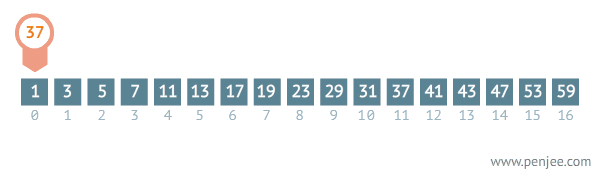

That’s the absolute best a Classical Computer can do — it’s got no additional information. There’s no point trying anything fancy; the next query you try is just as likely to be correct as any other, so you might as well do it.

Big-O Notation for the worst-case scenario of this algorithm is **O(n)**.

When we compare the above circuit with the circuit of Deutsch-Jozsa, they might seem similar. But the difference  is that in Deutsch-Jozsa, we tried to find the **function of the Black Box Oracle**, using our input and output. But here we are trying to find **correct input** using output and Oracle's function.

Oracle function will be determined by the user as he decides and designs the circuit. This gives the algorithm major boost in terms of flexibility.

The only things grover's oracle share are the fixed inputs and output. This means for most of inputs we get **0** and **1** for the correct one.

The example from the ‘game show’ saw the host using a simple function, just comparing if the input matched a pre-set value. But, so long as the Oracle sticks to those bounds from before, its function can be much, much more useful.

Perhaps, it could be a database of your user’s details, where each user has a unique ID. The Oracle would return ‘1’ for the ID you’re looking for, and ‘0’ for all others.

To program your Oracle, you’d need to know the correct answer already!

There’s more ways to check if the Query is correct than just if it equals a predetermined answer, though. Instead, you can set up the Oracle to evaluate the Query with some function. For the correct input, the function evaluates to **‘1’**, but evaluates to **‘0’** for all others.

It’s relatively easy to envisage a situation like this, where you know what you want your solution to do, but don’t quite know what that solution is. The key here is that a solution may be hard to find, but is always easy to verify.

# Quantum Grover's Algorithm :

## Imports required :

```python
import qiskit
import matplotlib as mpl
from random import randint
```

We are using **qiskit** for Quantum Circuit functions and **Matplotlib** for visualizing the responses. randint is used for generating random number for **hidden-bit** string.

## Structure of Algorithm :

The general Block diagram for Quantum Approach of Grover's Algorithm is as follows:
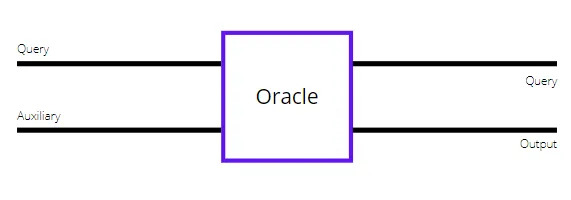

The Abstract quantum circuit representation of this algorithm is given below :

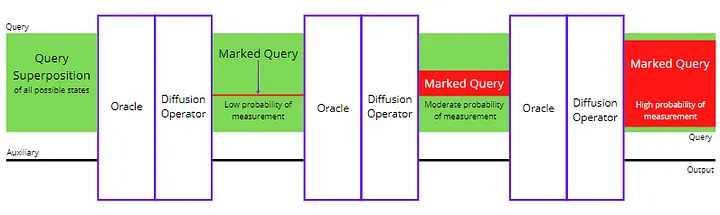

This Algorithm has 4 Parts. They are :

1. Input
2. Oracle
3. Diffuser
4. Output

### Input :

Input side we have our Query and an Auxiliary bit. We are using Superposition of all the input bits to send to consequent stages of algorithm at once.

We assume that hidden-bit string is present in upcoming stages, and our query gets compared with it. 

For example let us use **'0110'** as a 4-bit query string. 

Auxillary bit here doesn't hold up any information or the result of computation it only changes its state depending on the comparision of **Query** with **Hidden Bit-string**. 

```python
N = 4    #size of Query and hidden bit string
circuit = qiskit.QuantumCircuit(N+1,N)    # one extra qubit for the   
              # Auxiliary, and a classical bit for each Query qubit
```


### Oracle :

The superpositioned state of all bits are passed through the next stage of Algorithm called **Oracle**.

Characteristics of Oracle are :

1. It should take both the inputs: **Query** and **Auxillary**.
2. This oracle part should also contain hidden bit string.
3. Oracle checks and evaluates the Query with Bit-string.
4. If Query is correct add **negative Phase** to Query. If it is incorrect **Do Nothing**.
5. Output the Query and Auxillary.

In the **inputs** section we already introduced about **Query and Auxillary**. Now we are creating a function to generate a **random bit-string**. As it is hidden information we cannot hardcode the values of Bit-string.

```python
hidden_bits = randint(0,2**N-1) #random n-digit number
hidden_bits = format(hidden_bits,'0'+str(N)+'b') #binary convert
def Oracle(circuit,N,hidden_bits):
    circuit.barrier()
```

From the above considered examples, we can say that we have two bit strings in Oracle. 
```text
0101 -> Hidden Bit-string that only Oracle Knows.
0110 -> Query Bit-string which we can consider as example.
```

Function of Oracle is to **compare these two Bit-Strings**.

Here, we are using **MCX** Gate to control the Auxillary bit state which shows the status of comparision of both the strings.

Previously, we assumed that hidden bit string is present in consequent stages of Algorithm. That hidden bit is present before the oracle itself. 

For example. let us consider the Hidden Bit-string as **0101**. **MCX** gate flips the Auxillary only if all the control bits are **1**. So for the corresponding bit-string the MCX gate used is as follows:

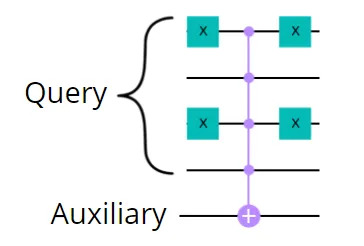

In this image we need to read from top to bottom order for **0101** bit string. This means those bits with **0** are placed with **X** gates and making them to convert it into **1**.

This is because, if we do not use the **X** gates the state of Auxillary bit is changed only when input **1111** then only Auxillary bit gets flipped. But the hidden bit string cannot always be **1111**. So we are placing **X** gates to the correponding **0s** of random hidden bit-string.

We use the **X** gates after the **MCX** operation to retreive back the hidden bit-string.
If and only If the correct Query is passed through the circuit then only all the control bits of **MCX** will be in **1** state which flips Auxillary bit.

- This means Auxillary bit should hold the **Eigenstate of MCX** gate.

For time-being, let us only consider the **X** part of **MCX** gate. This **X** gate has two Eigenstates $|+\rangle$ and $|-\rangle$. 

- $|+\rangle$ has Eigenvalue of **+1** which doesn't make significant change for our algorithm as it changes between **0 to 1**.

- So we use $|-\rangle$ which has Eigenvalue of **-1**. This gives us negative amplitudes which are required for our algorithm.

In order to get $|-\rangle$ we take our initial state $|0\rangle$ and apply **X-Gate** to make it $|1\rangle$ and then apply **Hadamard** to get $|-\rangle$.

```python
circuit.x(N)  # bring Auxiliary into '1', then '-' state for
circuit.h(N)  # Phase Kickback
```
Now we are applying Hadarmard for all Qubits to obtain super position state that can be used to pass through the consequent stages.

```python
for i in range(N):
    circuit.h(i)
circuit.barrier()
```

We need to loop through Hidden-bit string to apply **X-gates** for the 0s of random hidden bit-string. And to not hard-code to our example we need to apply **MCX** gate to **length of Query**(excluding Auxillary) because Auxillary is target bit for **MCX**.

So after performing corresponding changes in our program it would be as follows :
```python

hidden_bits = randint(0,2**N-1) #random n-digit number
hidden_bits = format(hidden_bits,'0'+str(N)+'b') #binary convert

def Oracle(circuit,N,hidden_bits):
    circuit.barrier()
    for i in range(len(hidden_bits)):
        if hidden_bits[i] == '0':
            circuit.x(i) #apply X Gates to ’0’s so they can activate MCX
    circuit.mcx(list(range(N)),N) # check if qubit is perfectly correct
    for i in range(len(hidden_bits)):
        if hidden_bits[i] == '0':
            circuit.x(i)   #finish wrapping X Gates around '0's
    circuit.barrier()
    return circuit
```

Now we need to go with 4th characteristic as discussed above. Applying **negative Phase** only if the Query is correct.

Here, we are using our Auxillary in $|-\rangle$ state as it is EigenState of **X** part of **MCX** gate. The corresponding Eigenvalue **-1** in this case gets applied to all control Qubits here. This is due to phenomenon called **Phase Kickback**.

The reason why we are using this **Negative Phase Kickback** is because here we are trying to highlight the correct bit-string from all the superposition states by flipping it to **negative** Amplitudes. 

This Phase-Kickback affects every control Qubit turning from **Positive** to **Negative** and (Vice-versa).
$$|0\rangle \implies -|0\rangle$$
$$|1\rangle \implies -|1\rangle$$

This means when we pass any Query through the oracle, these bits of Query gets flipped as shown above. This concept is called **Global Phase**. 

- **Global Phase** doesn't have any significant effect on Qubit at all.

- It doesn't affect measurement or make any different changes when any gates applied.

When the Oracle acts upon our equal superposition, the MCX Gate only activates for the specific part of the superposition which exactly matched the hidden bit string. Only that state gets multiplied by **‘-1’**, and has its phase flipped.

So, we end up with our 4-qubit superposition looking like this (w.r.t hidden bit-string **'0101'**):

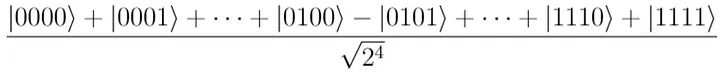

### Diffusion Operator and Amplitude Amplification :

So far, we’ve prepared our Query in an equal superposition, and sent it through the Oracle. The Oracle gave us that same superposition, but where the correct state has a negative phase (the one just above).

It can be represented as follows :
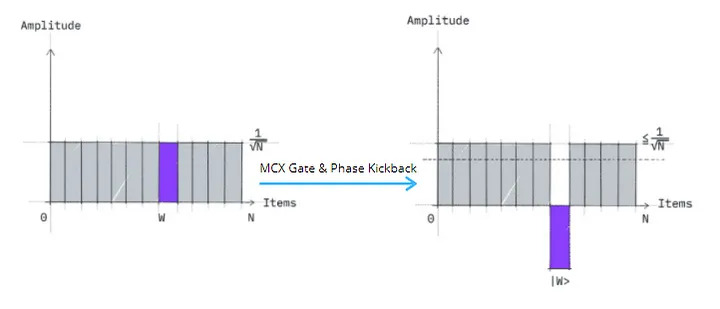

```text
Here onwards
N is  number of Qubits.
n is size of search space.

n=2**N

N in the above plots is refering to n.
```

But, the **-1** phase which we added to correct state doesn't mean any probability. It is the ***Probability Amplitude*** of negative Magitude.

In the above diagram we can see that the **mean probability of all superposition** states is $\frac{1}{\sqrt{n}}$ where **n** is Length of bitstring. So when we flipped the probabiltiy amplitude of correct state the **mean probability** also reduces i.e., $\leq\frac{1}{\sqrt{n}}$ as respresented in above image.

To find the probability, we’d have to square the amplitude — and the **‘-1’ will square to give us ‘1’**. All the other states would square **‘1’ to give ‘1’**, too — right now, we’re still in an equal superposition! 

- Every state has the same chance of being measured, and we’re no closer to our goal of isolating the correct state.

This is where **Amplitude Amplification** comes into Picture. We are going to perform this technique using a **Diffusion Operator** or **Diffuser**. It will increase the probability amplitude of the **negative state** while decreasing the probability amplitude of other states simultaneously.

Now we have two states **equal superposition state** and **winning or correct State**. Let us consider **equal superpositon state** as $|s\rangle$ and **winning state** as $|w\rangle$.

Since $|w\rangle$ is also a component of $|s\rangle$ we cannot consider them as orthogonal vectors. But we want an othogonal state to visualize **amplitude amplification** on the plot.

One way is subtracting $|w\rangle$ from $|s\rangle$. Let it be represented as $|s^|\rangle$. 
$$|s^|\rangle = |s\rangle - |w\rangle$$

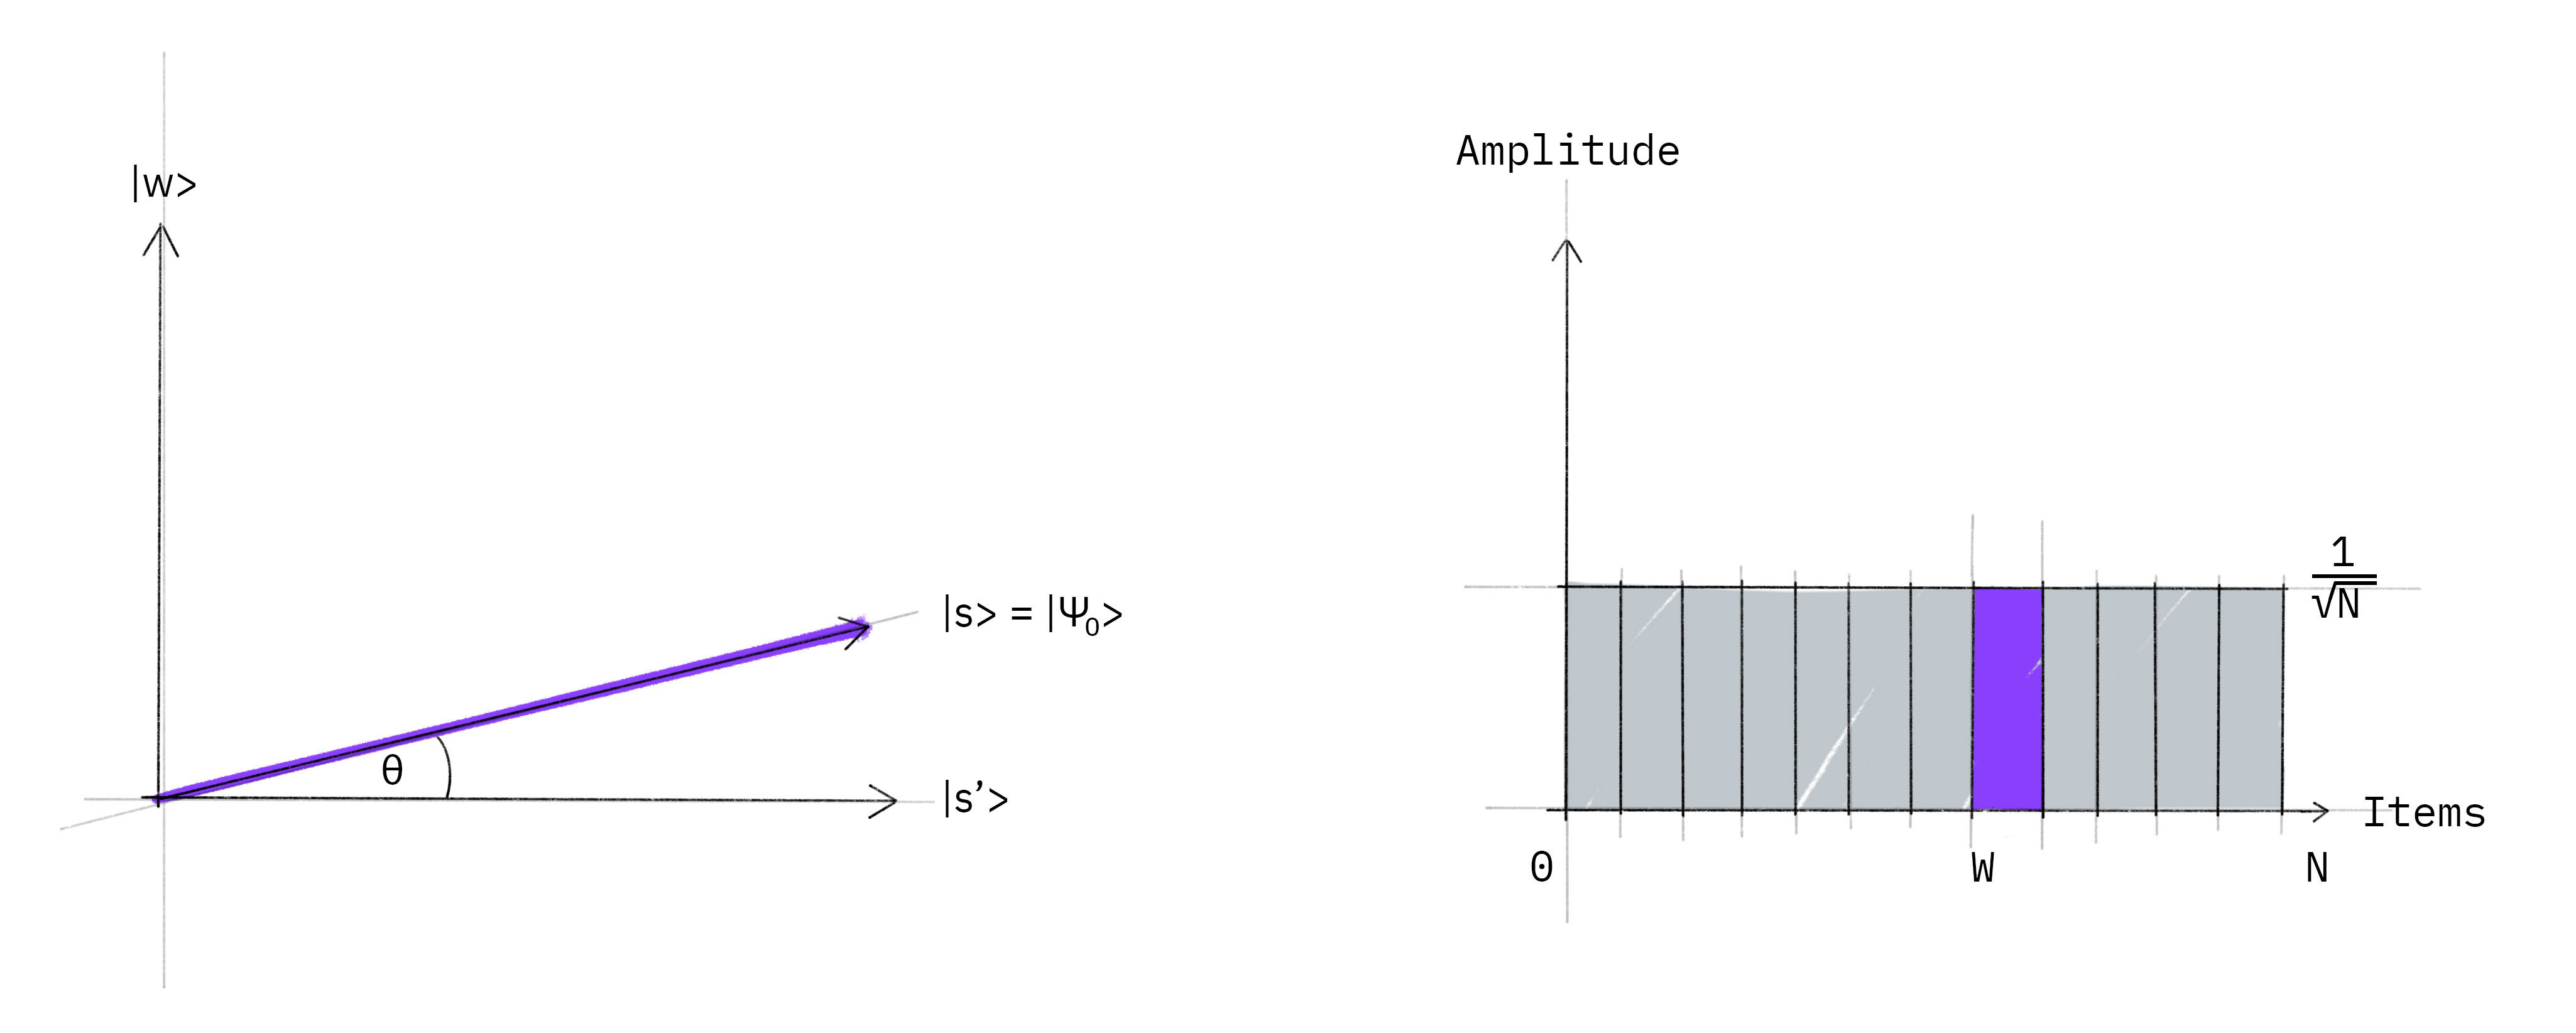

The two axes represents the probability amplitudes of their respective states. More intuitively, it’s like a measure of how much of $|s^|\rangle$ and $|w\rangle$ are contained within a plotted state.

For example, the winning state $|w\rangle$ only contains $|w\rangle$, and contains none of $|s^|\rangle$. So, it would be a perfectly vertical line, directly on the $|w\rangle$ axis.

State $|s\rangle$ is the linear combination of every individual state. It is represented at the ending of Oracle section.

Linear combinations are how we write most superposition states — two orthogonal basis vectors **(‘0’ and ‘1’)** and their coefficients (probability amplitudes).

- The image above uses **‘0’ and ‘1’** as their **basis vectors**. It’s very commonly used — they’re useful and orthogonal, after all.

So w.r.t this factor we already have got the orthogonal states $|w\rangle$ and $|s^|\rangle$. Now we need to create Linear combination of both of them and represent $|s\rangle$ through it.

This means we $$|s\rangle = \alpha |w\rangle + \beta |s^|\rangle $$ and we need to find value of both coefficients.

To do that, it helps to remember that those coefficients are the probability amplitudes. 

- Because $|s\rangle$ is the equal superposition, we know that every individual state **(‘0000’, ‘0001’,...)** has the same chance of being measured.
- Since $|w\rangle$ is just one of these states, we know the probability of measuring is $\frac{1}{n}$ (remember, **’n’** is the size of our input domain, so this is just the average probability).

$|s^|\rangle$ is every state which is **not** $|w\rangle$, number of states in $|s^|\rangle$ is **n-1**. 
- Probability of measuring $|s^|\rangle$ from  equal superposition $|s\rangle$ is **(n-1)/n**.

From there, we can just square root the probabilities to find probability amplitudes. Then apply those amplitudes to the linear combination:

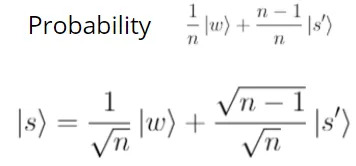

Here $|s^|\rangle$ occupies most part of $|s\rangle$ on the plot as it covers all the region apart from $|w\rangle$ and its values is very close to 1.

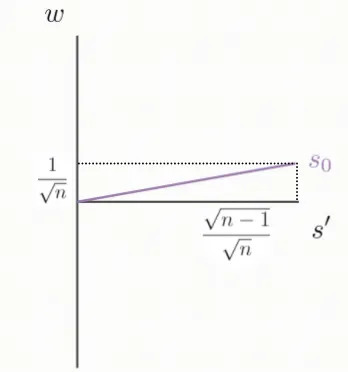

Now the Oracle took in $|s\rangle$, the equal superposition. The state it output was extremely similar — the only difference was that the correct state, $|w\rangle$, had been multiplied by **‘-1’**.

This slightly changed our linear combination for ‘s’. 
$$|s\rangle  = -\frac{1}{\sqrt{n}}|w\rangle + \frac{\sqrt{n-1}}{\sqrt{n}}|s^|\rangle$$

```text
Now the probability amplitude for 'w' is negative.
```
So, graphically, what does this mean? We’ve multiplied the amplitude of $|w\rangle$ by **‘-1’**. The value for $|s^|\rangle$, however, remained unchanged. So, if we re-draw our line, we end up seeing this.

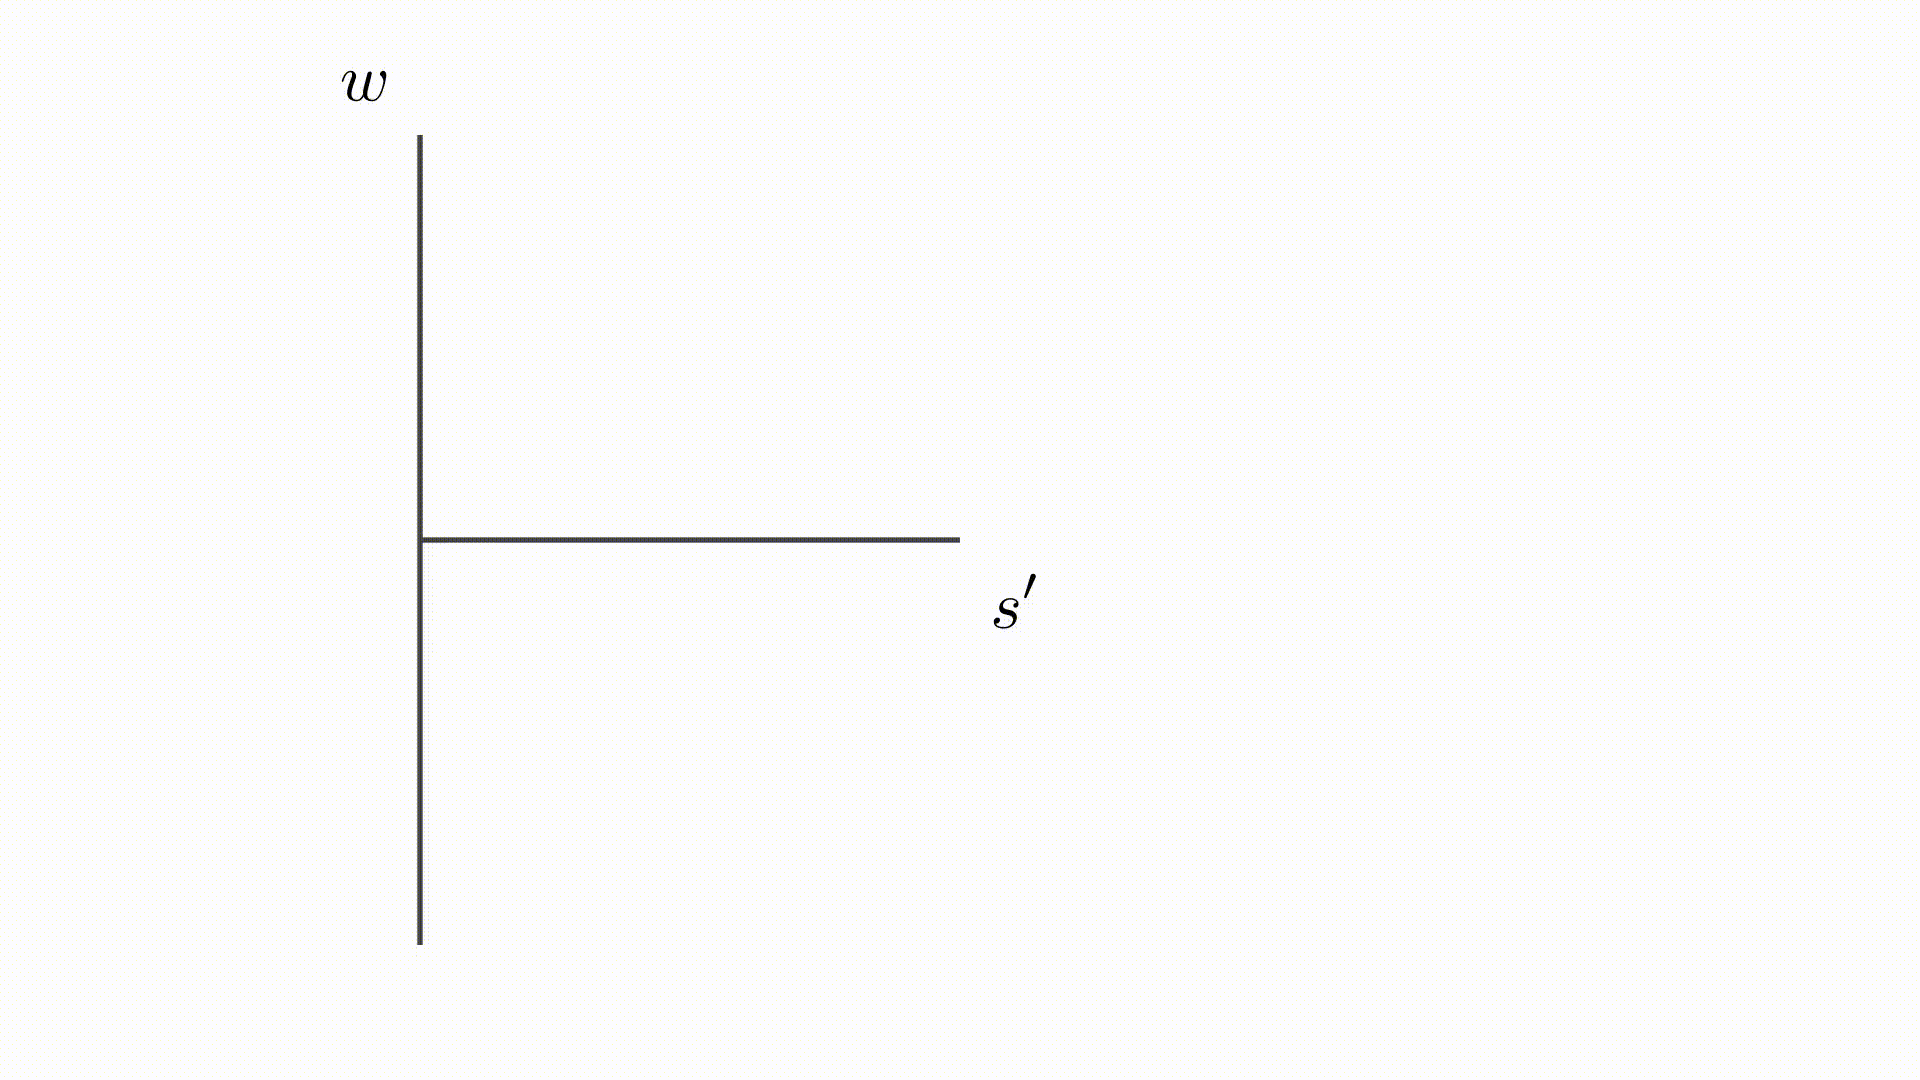

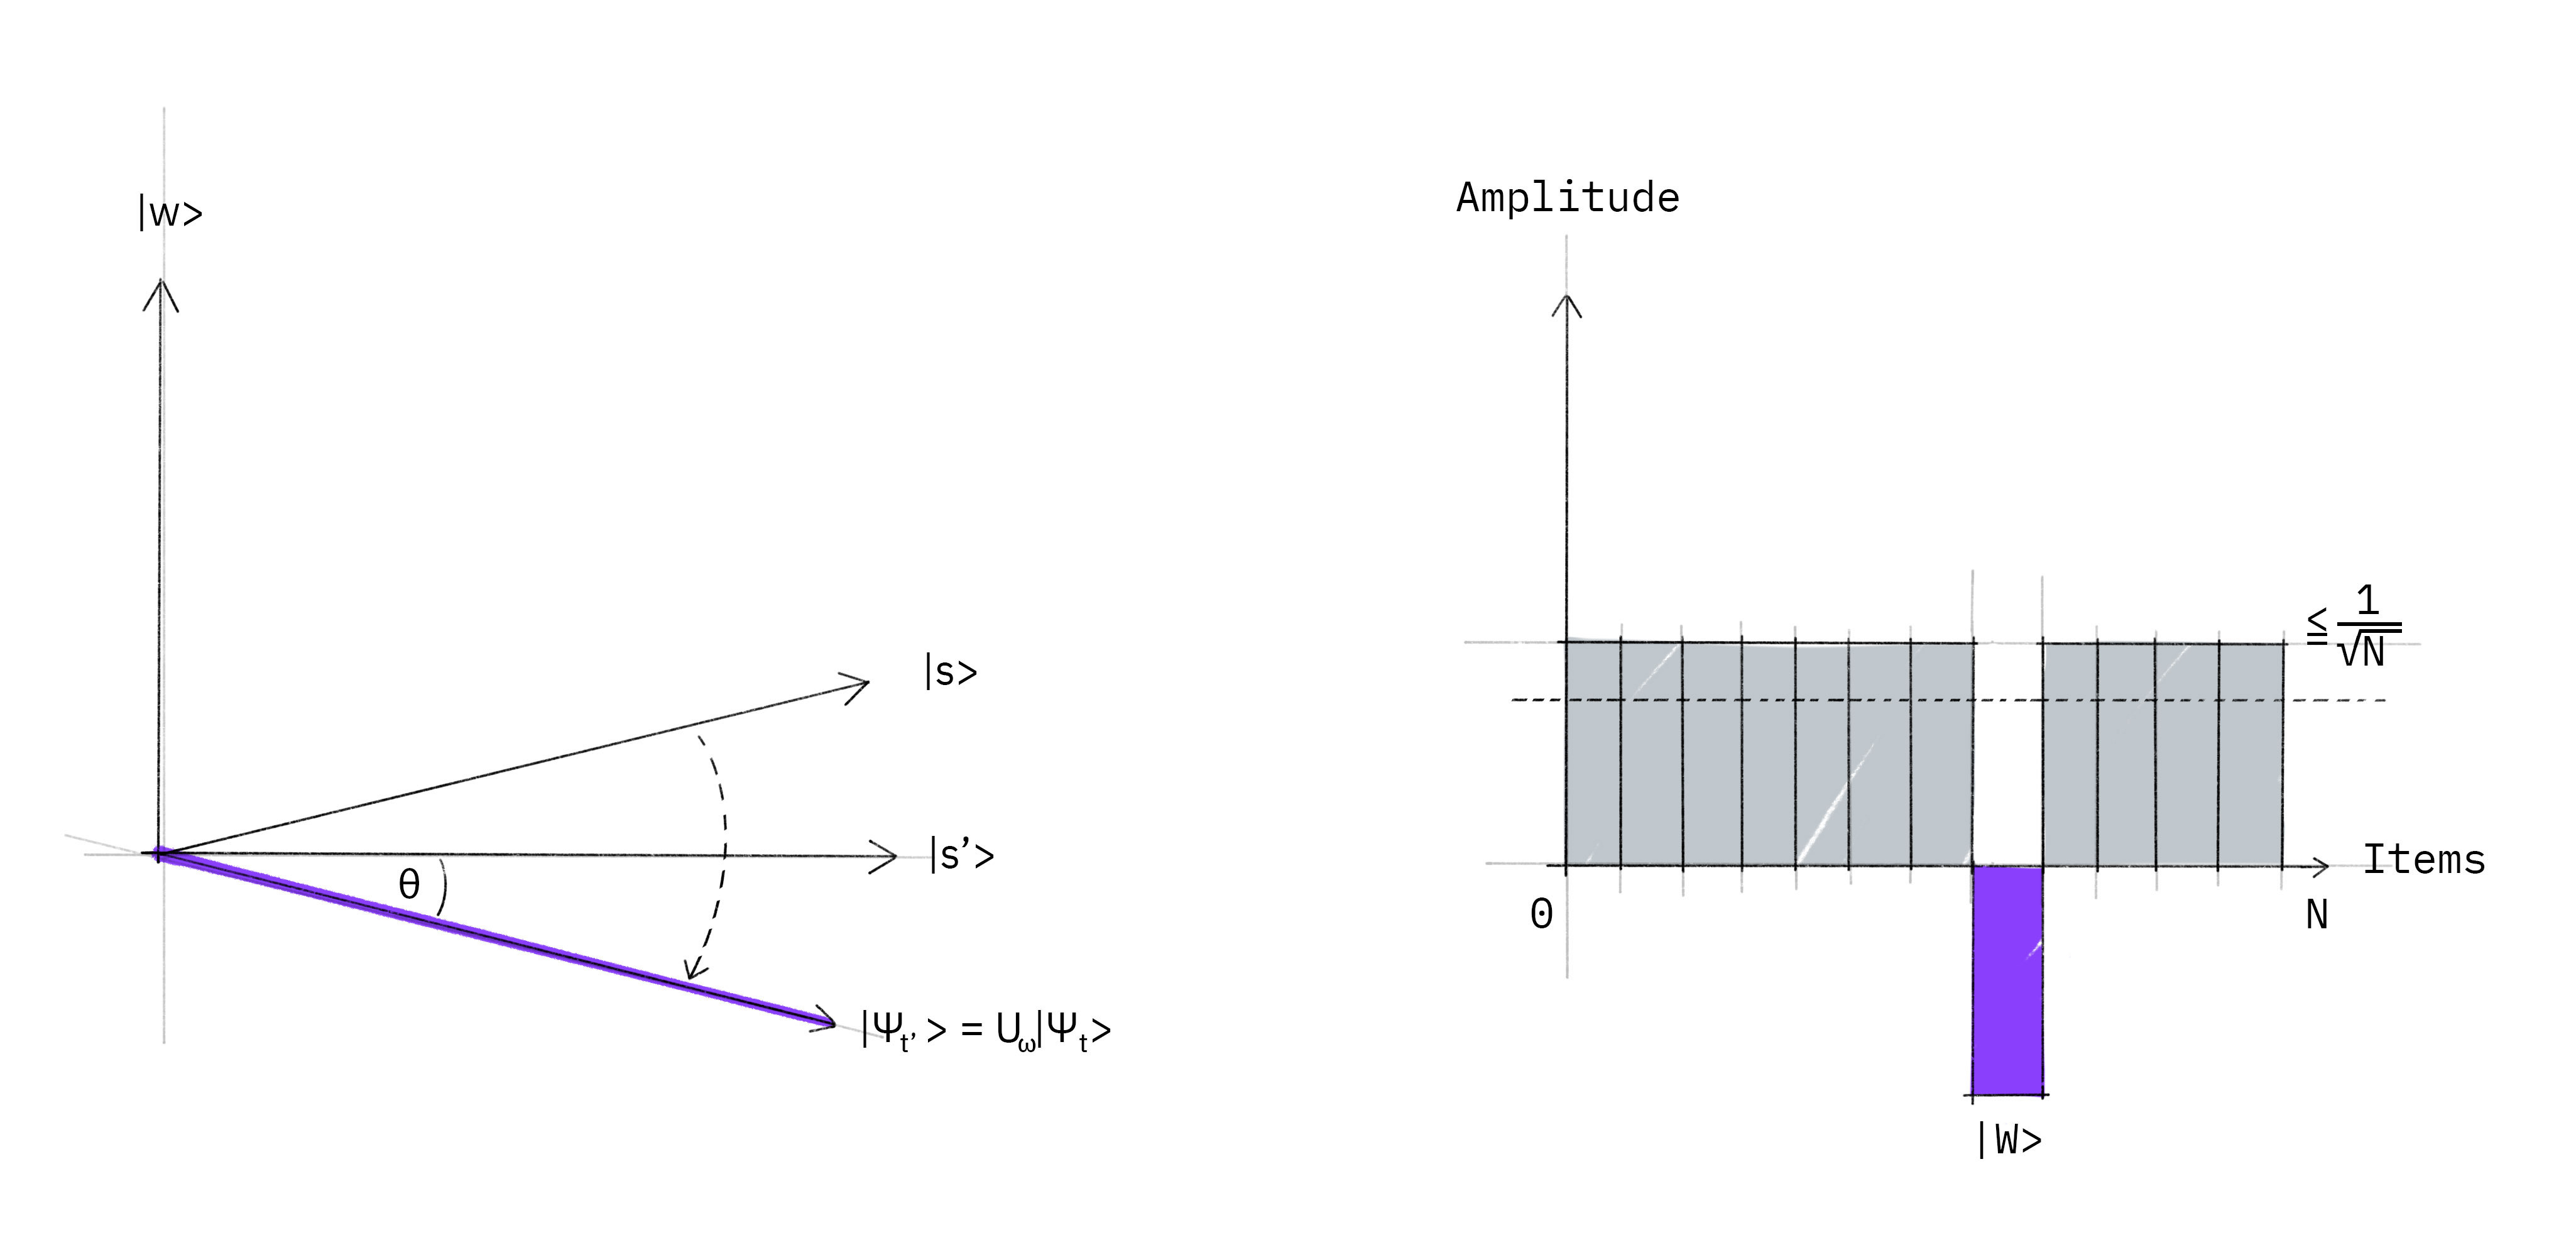

```text
The line flips around s' ! Because ‘w’ has been multiplied by ‘-1’, every point on the line now has a negative ‘w’ value. This has the effect of a horizontal reflection.
```

Right now we have attained equal superposition with negative $|w\rangle$. Now we need to apply our **Diffuser** or **Diffusion Operator**.

Somehow, we need to try to move towards $|w\rangle$ axis to get high chances of measuring correct state.

We can’t just rotate $|s\rangle$ over to $|w\rangle$ — we have absolutely no idea how far to go. We might **overshoot or undershoot**, and we’d have no way to tell.

So let us restrict ourselves to reflections. 

- Reflection around $|w\rangle$ brings us no closer to $|w\rangle$.

- Reflection around $|s^|\rangle$ brings back to original state.

So the only option we have is to reflect around $|s\rangle$ state.

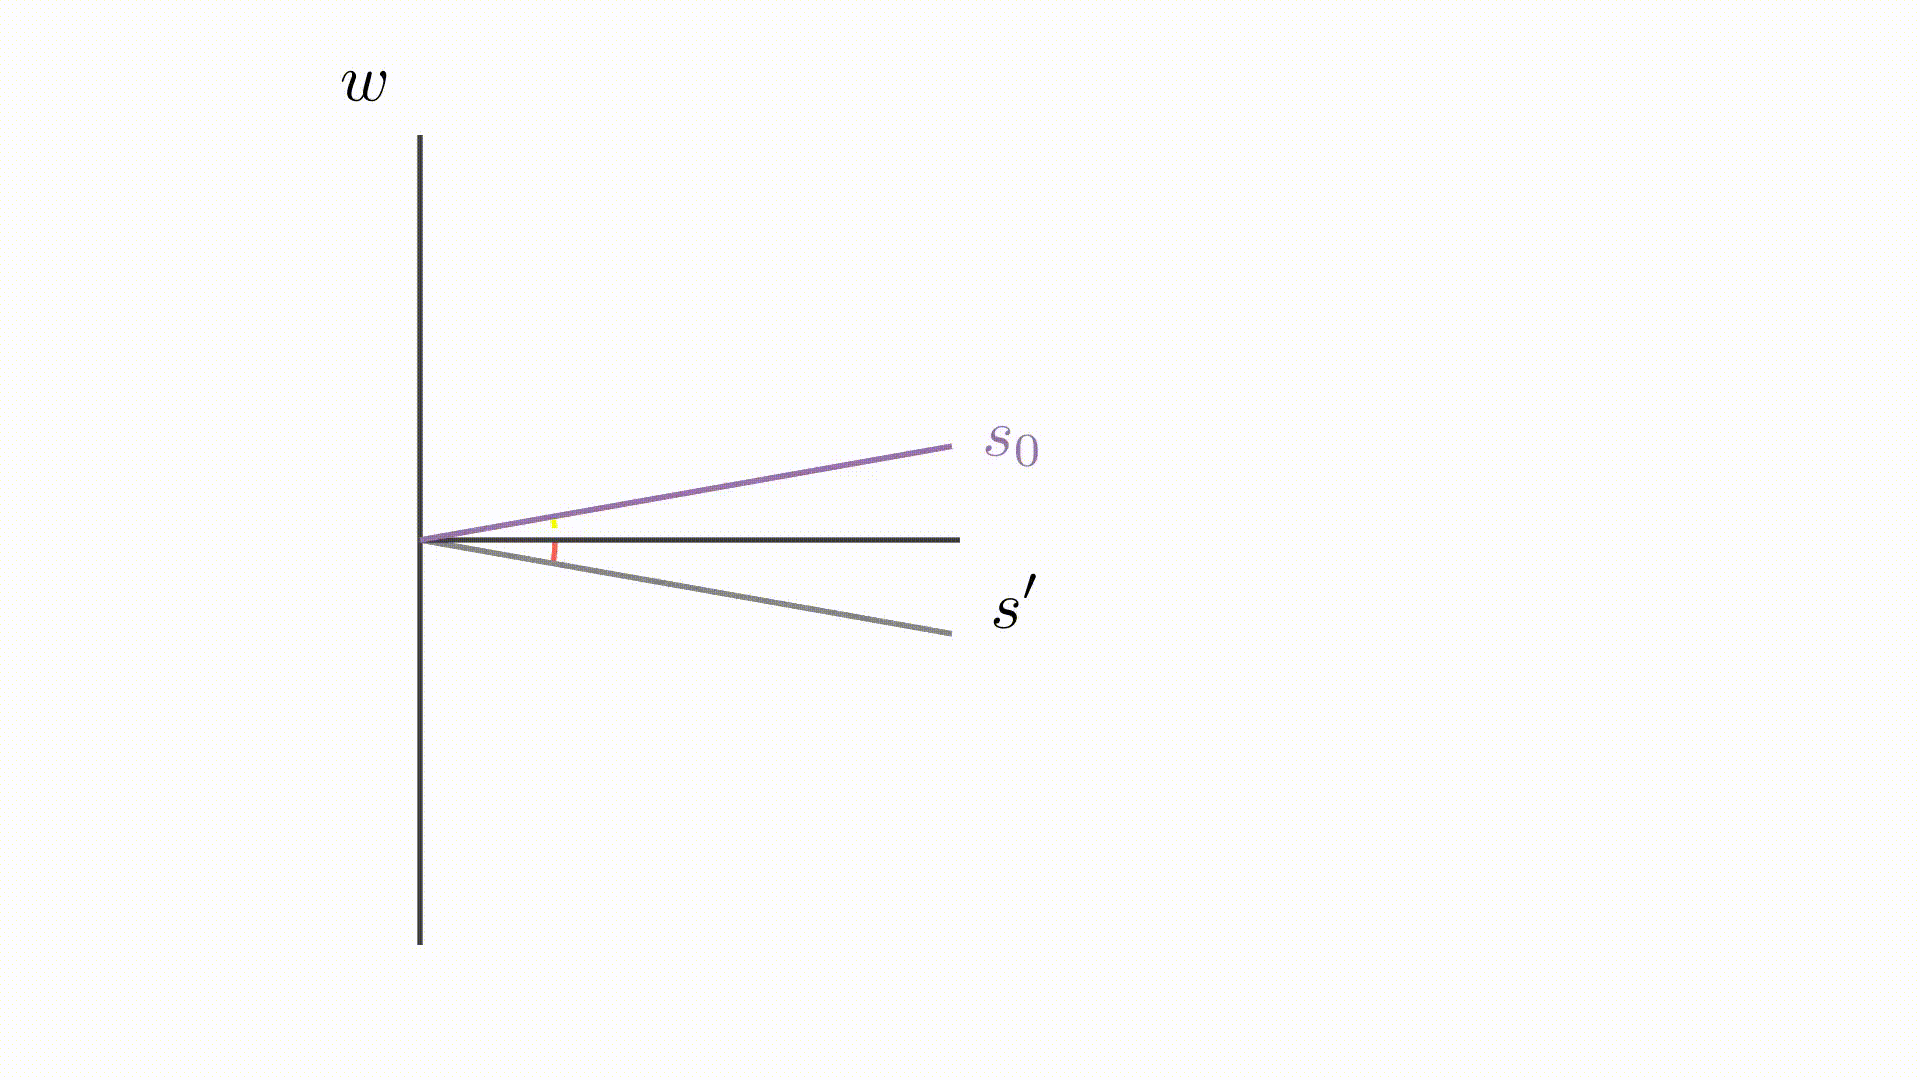

```text
By reflecting around ‘s’, we get a new superposition — one that’s much 
more likely to give us the correct answer upon measurement.
```

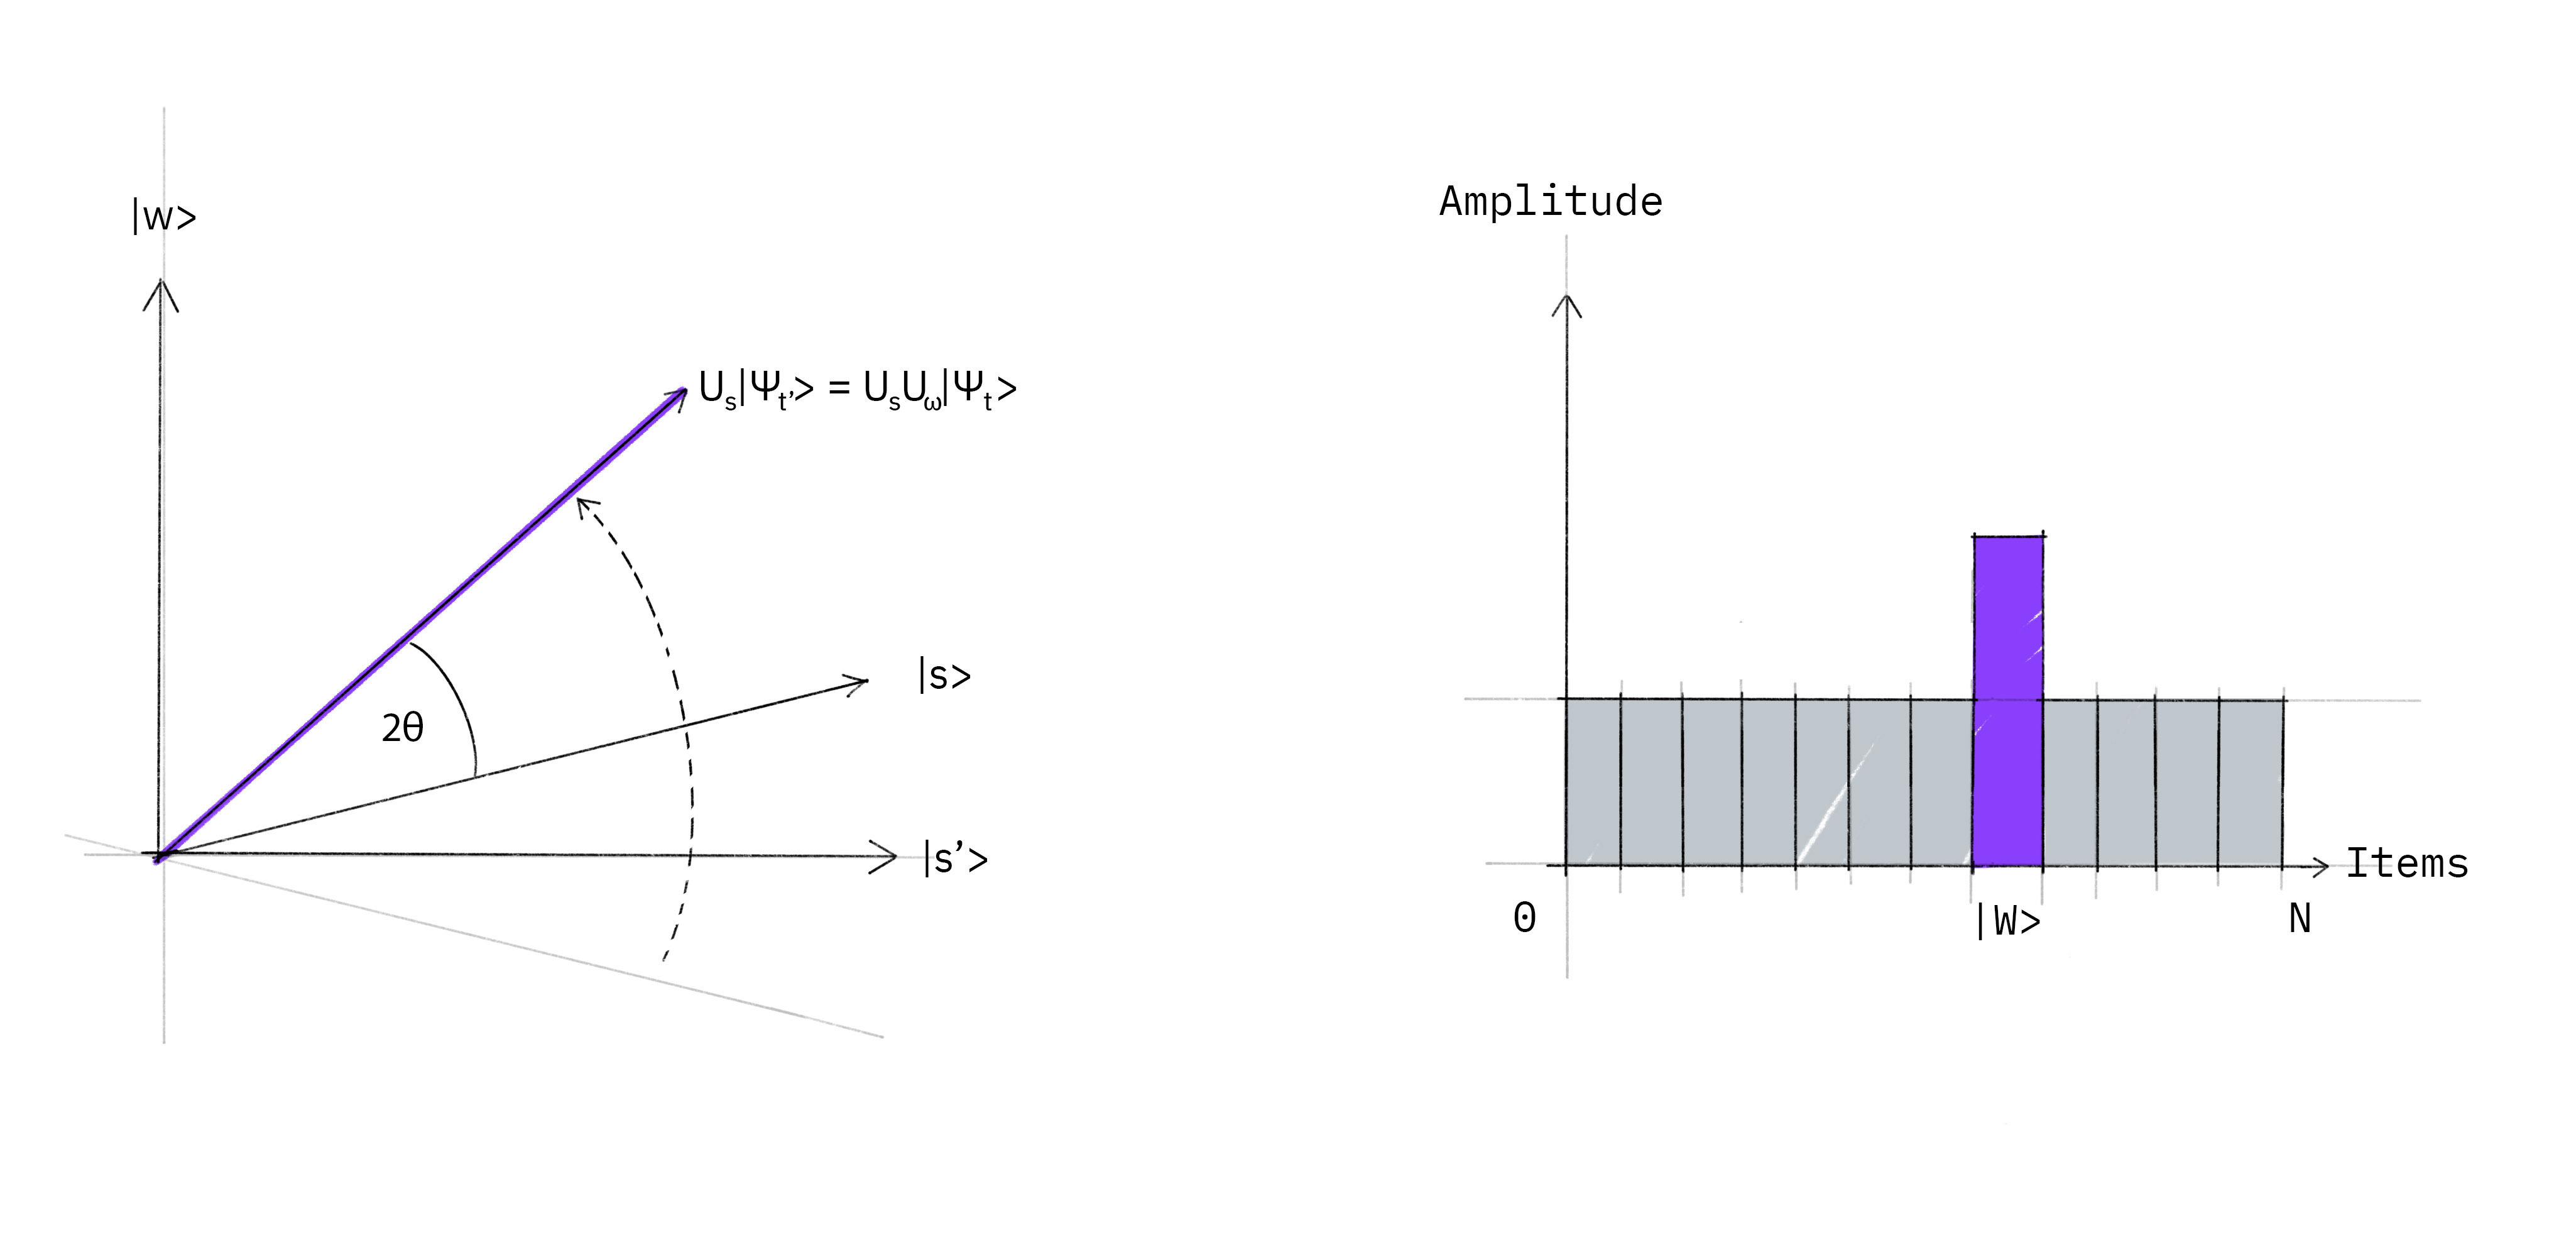

In this new superposition, as you can see, the $|w\rangle$ value is much larger. We’re closer to our goal! If we measure this new superposition, $|s_1\rangle$, we’re more likely to measure $|w\rangle$ than before.

Excellent news, but $|w\rangle$ is still fairly unlikely. Now, let’s move even closer to $|w\rangle$. Apply the Oracle to reflect in $|s^|\rangle$, then apply the Diffuser to reflect in $|s_0\rangle$. And again, until we get a state that’s extremely likely to collapse to $|w\rangle$ upon measurement.

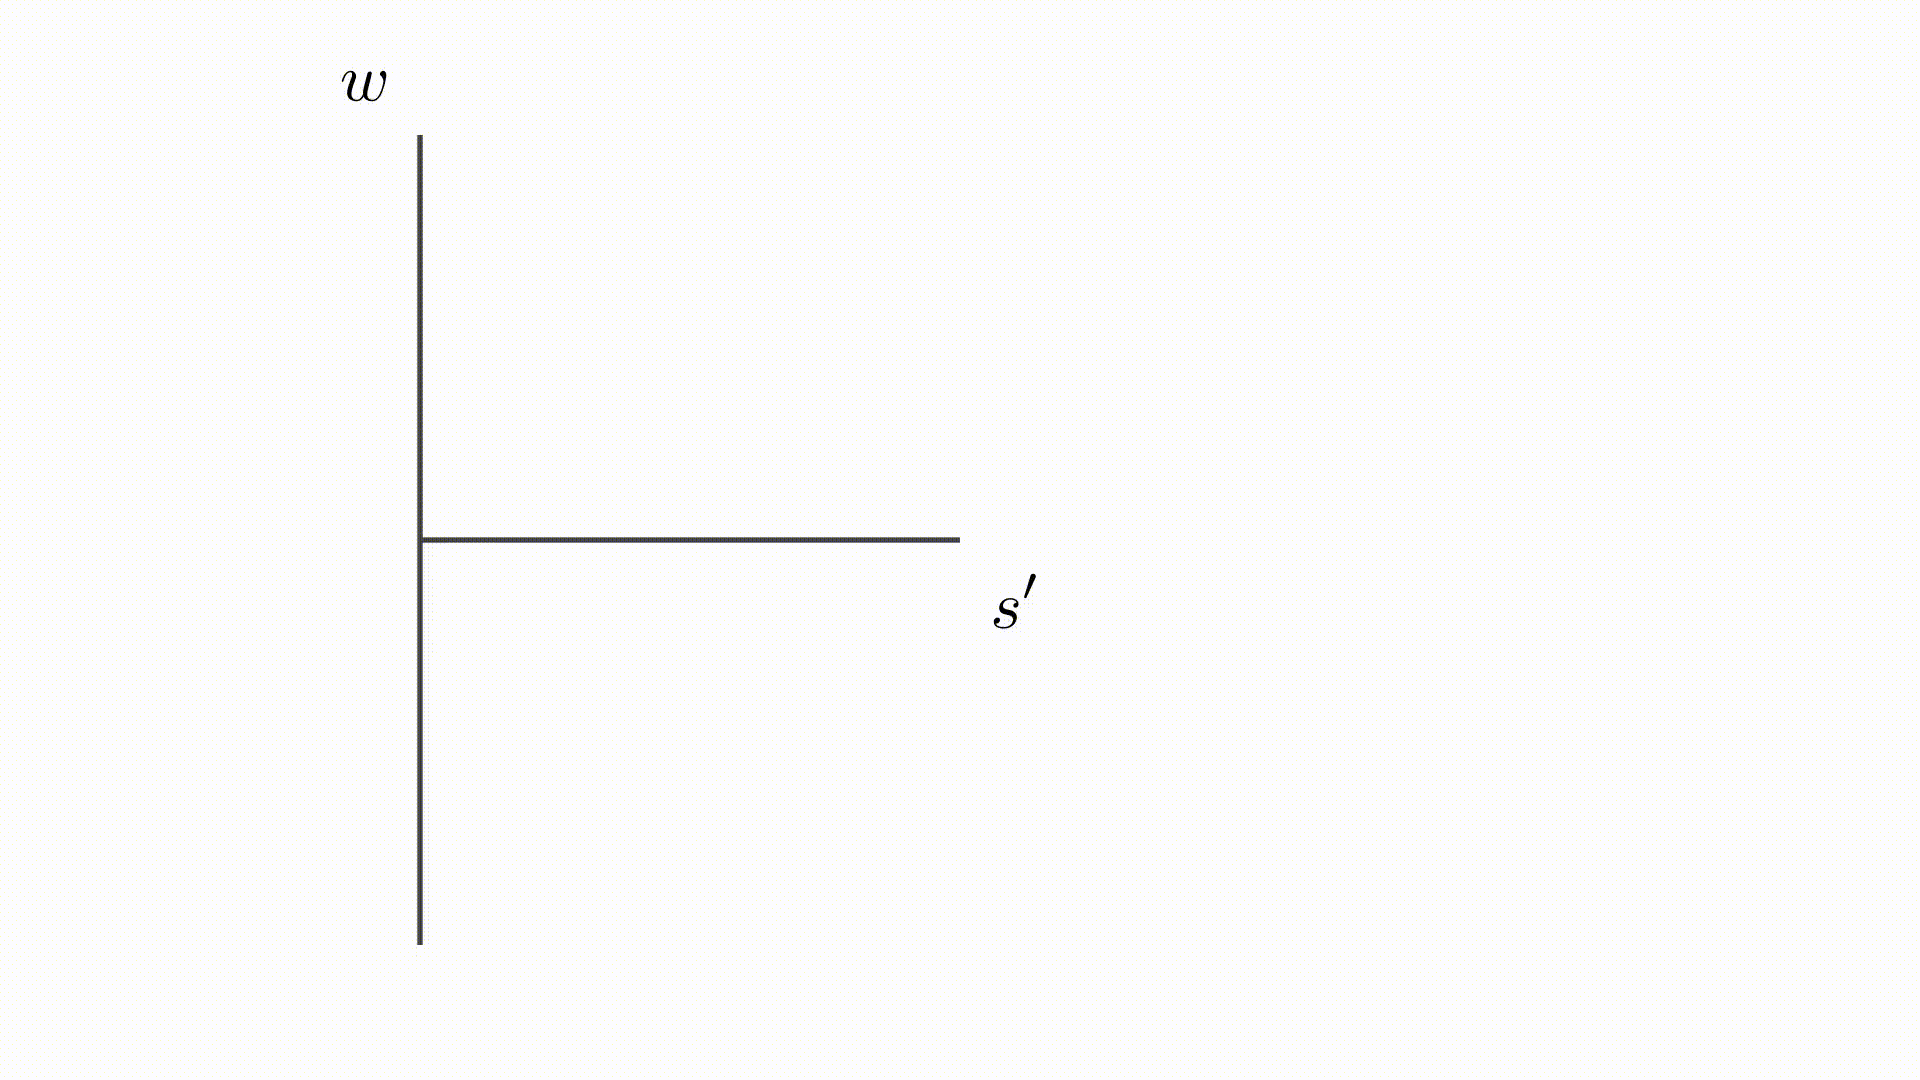

```text
The full Amplitude Amplification procedure! By the end, the final superposition state ‘s_4’ is extremely close to ‘w’.
```

#### How many times we need to apply Oracle+Diffusor combination?

Let us again consider $|s\rangle$ and $|s^|\rangle$. Let the initial angle between both of them is $\theta$.

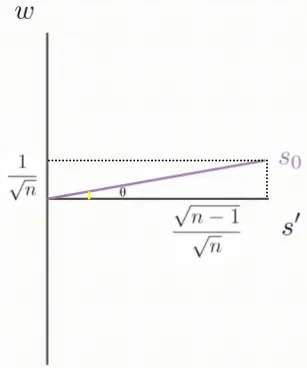

$$tan(\theta) = \frac{1}{\sqrt{n}} \div \frac{\sqrt{n-1}}{\sqrt{n}} = 1 \div \sqrt{n-1}$$
$$\implies \theta = tan^{-1}(\frac{1}{\sqrt{n-1}})$$

If **n** is large number, then this fraction becomes extremely small number, and its graph after applying **inverse tan** is almost **linear**.

By this we can say that the Oracle+Diffusor combination can be applied a **whole number of times**.

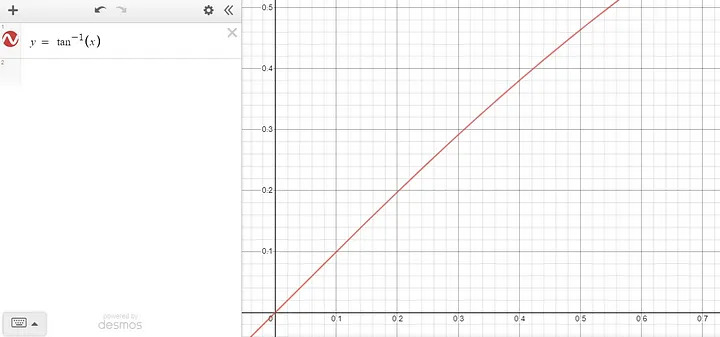

```text
When 'n' is large, it causes fraction to be small. 
In all these ranges, inverse tan graph is approximately linear.
```

In the above graph, **‘x=0.5’** happens when our function for θ receives an input of **‘n=5’**. Even with an input domain of **5** (which is really quite small for **‘decently large’!**) the difference between inverse tan and a linear graph is miniscule. It’s all the way down in the hundreths!

So, for practical purposes, we can just cut out the inverse tan and subtraction of 1 entirely, and approximate $\theta$ to be:
$$\Large{\boxed{\theta \approx \frac{1}{\sqrt{n}}}}$$

We Know that $|w\rangle$ and $|s^|\rangle$ are orthogonal, the angle between them is $\frac{\pi}{2}$ radians. But as angle of $\theta$ is already being covered in first superposition which makes little difference.

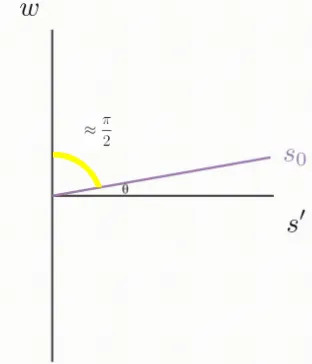

```text
we need to cover approximately (pi/2) radians to reach 'w'
```

#### How much turn is happening for each oracle+diffusor cycle?

Each cycle consists of reflection around $|s^|\rangle$ and then $|s\rangle$. And angle between first reflection and $|s^|\rangle$ is $\theta$.

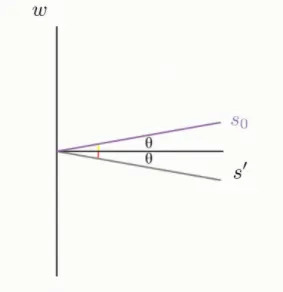

The angle between these two lines are $2\theta$. So, when we reflect in $|s\rangle$, the total rotation towards $|w\rangle$ is $2\theta$.

We need to cover $\frac{\pi}{2}$ radians in steps of $2\theta$. 
$$\begin{aligned}
(\frac{\pi}{2} \div 2\theta) &= (\frac{\pi}{4}\div\theta)\\
&=(\frac{\pi}{4}\div\frac{1}{\sqrt{n}})\\
&=\frac{\pi}{4}\sqrt{2^N}\ \ \ times \\
where\ N &\implies number\ of\ Qubits \\
n &\implies size\ of\ search\ space\\
and\ n&=2^N\\
\end{aligned}$$

So this is where $\sqrt{n}$ in the complexity comes from. Here we are running Oracle+Diffusor combination $\sqrt{n}$ times which is also multiplied by fractor $\frac{\pi}{4}$ gives result fairly close to **1**.

In simpler terms, for each integer in $\frac{\pi*\sqrt{n}}{4}$ reflect once around $|s^|\rangle$ and then reflect once around $|s\rangle$.

Here the **reflection** around $|s^|\rangle$ means Oracle applying **negative Phase** to $|w\rangle$. In other words, it was just a phase kickback multiplying $|w\rangle$ state by **-1**.

Now reflection arounf $|s\rangle$ is a bit tricky. Initially, we used **Hadamard** operators for every Query bit which was initially **0000**. Now let us applyu same Hadamard operators to get back **0000** state of Query.

Now let us tilt our graph such that now $|s\rangle$ becomes horizontal axis not $|s^|\rangle$.

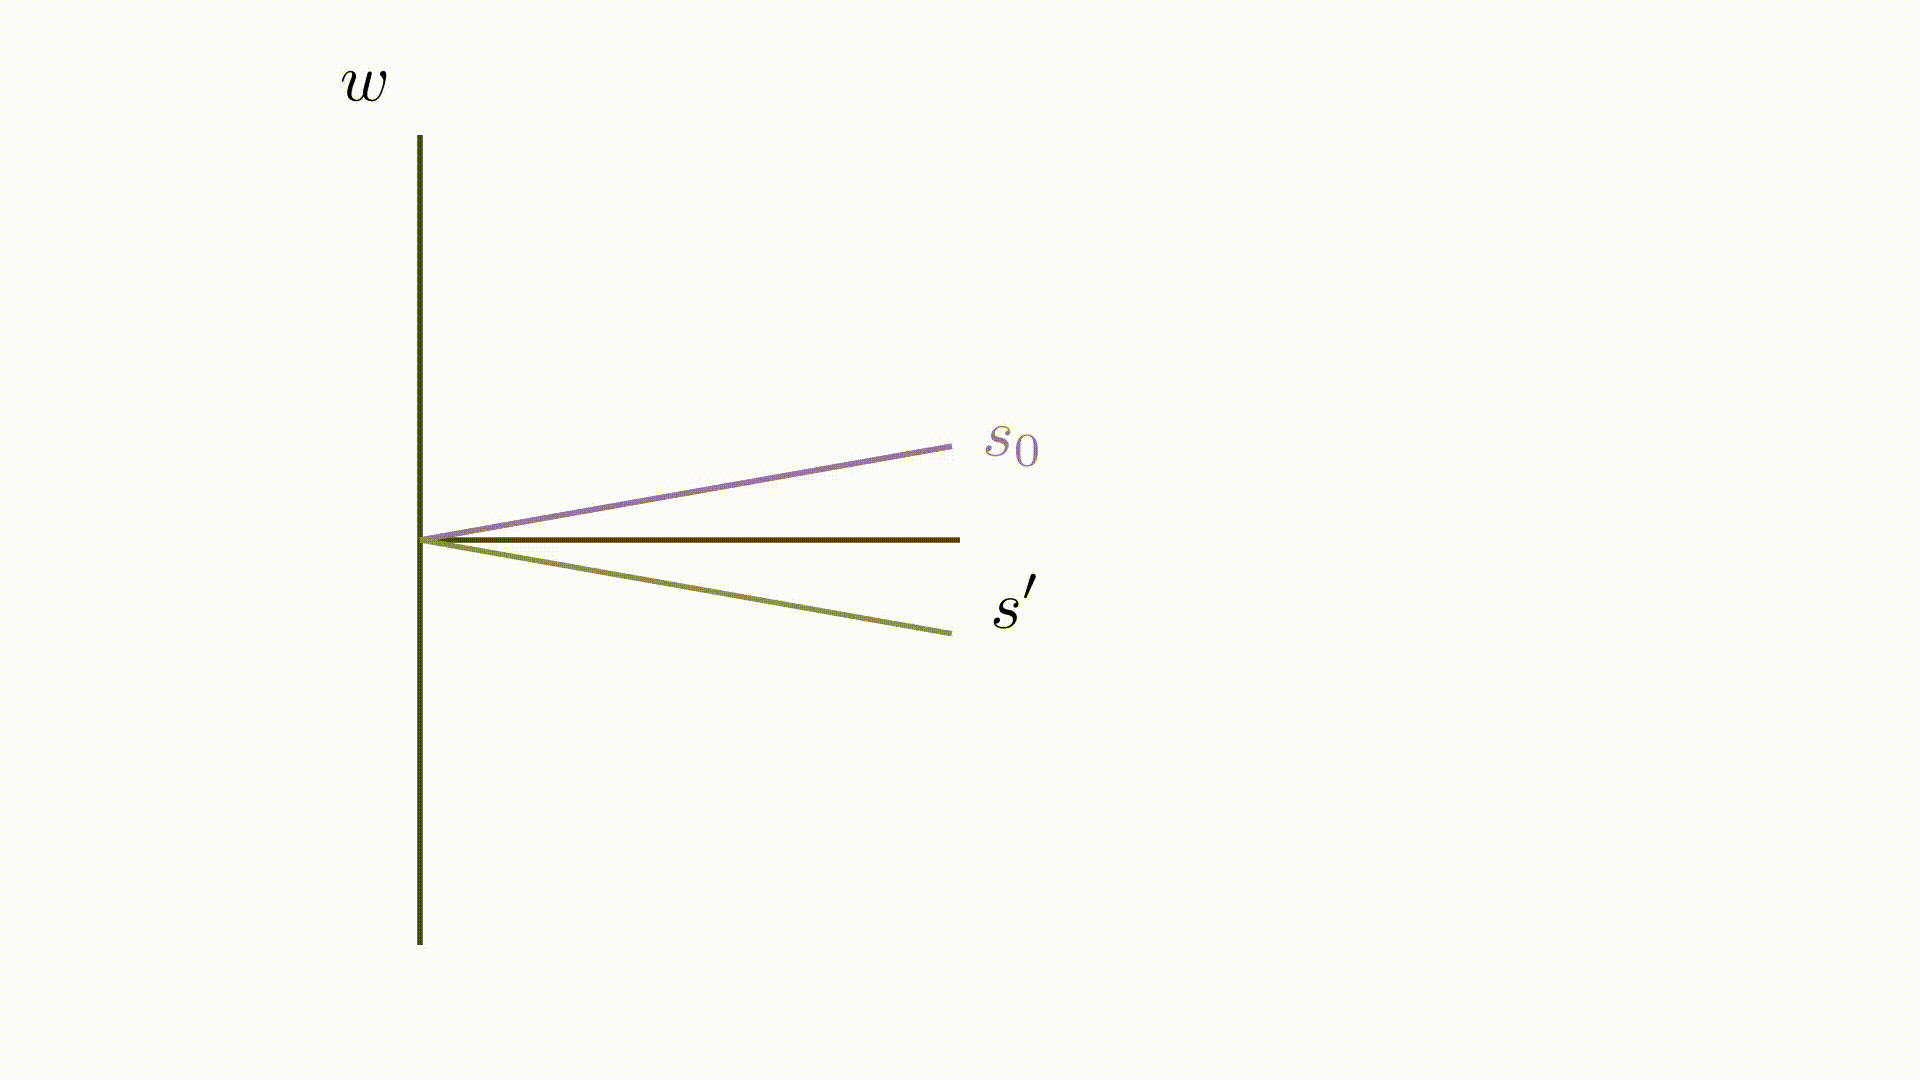

We already Knew that MCX gate only activates if all query bits are **1**. But now the Query is value of $|s\rangle$ with state **0000**, so MCX won't activate. So add **X** Gates for every query bit to trigger **MCX** gate.

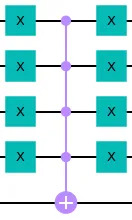

For the reflected $|s\rangle$ state which actually enters the circuit, **Phase Kickback adds a negative phase to every state**. Just like before, this results in a reflection around the horizontal axis; in this case, though, the horizontal axis is $|s\rangle$.

To finish off, all we have to do is return $|s\rangle$ to its superposition. Just pop a Hadamard on all of the Query qubits again, and you’re done!

For better understanding go through the following plot.
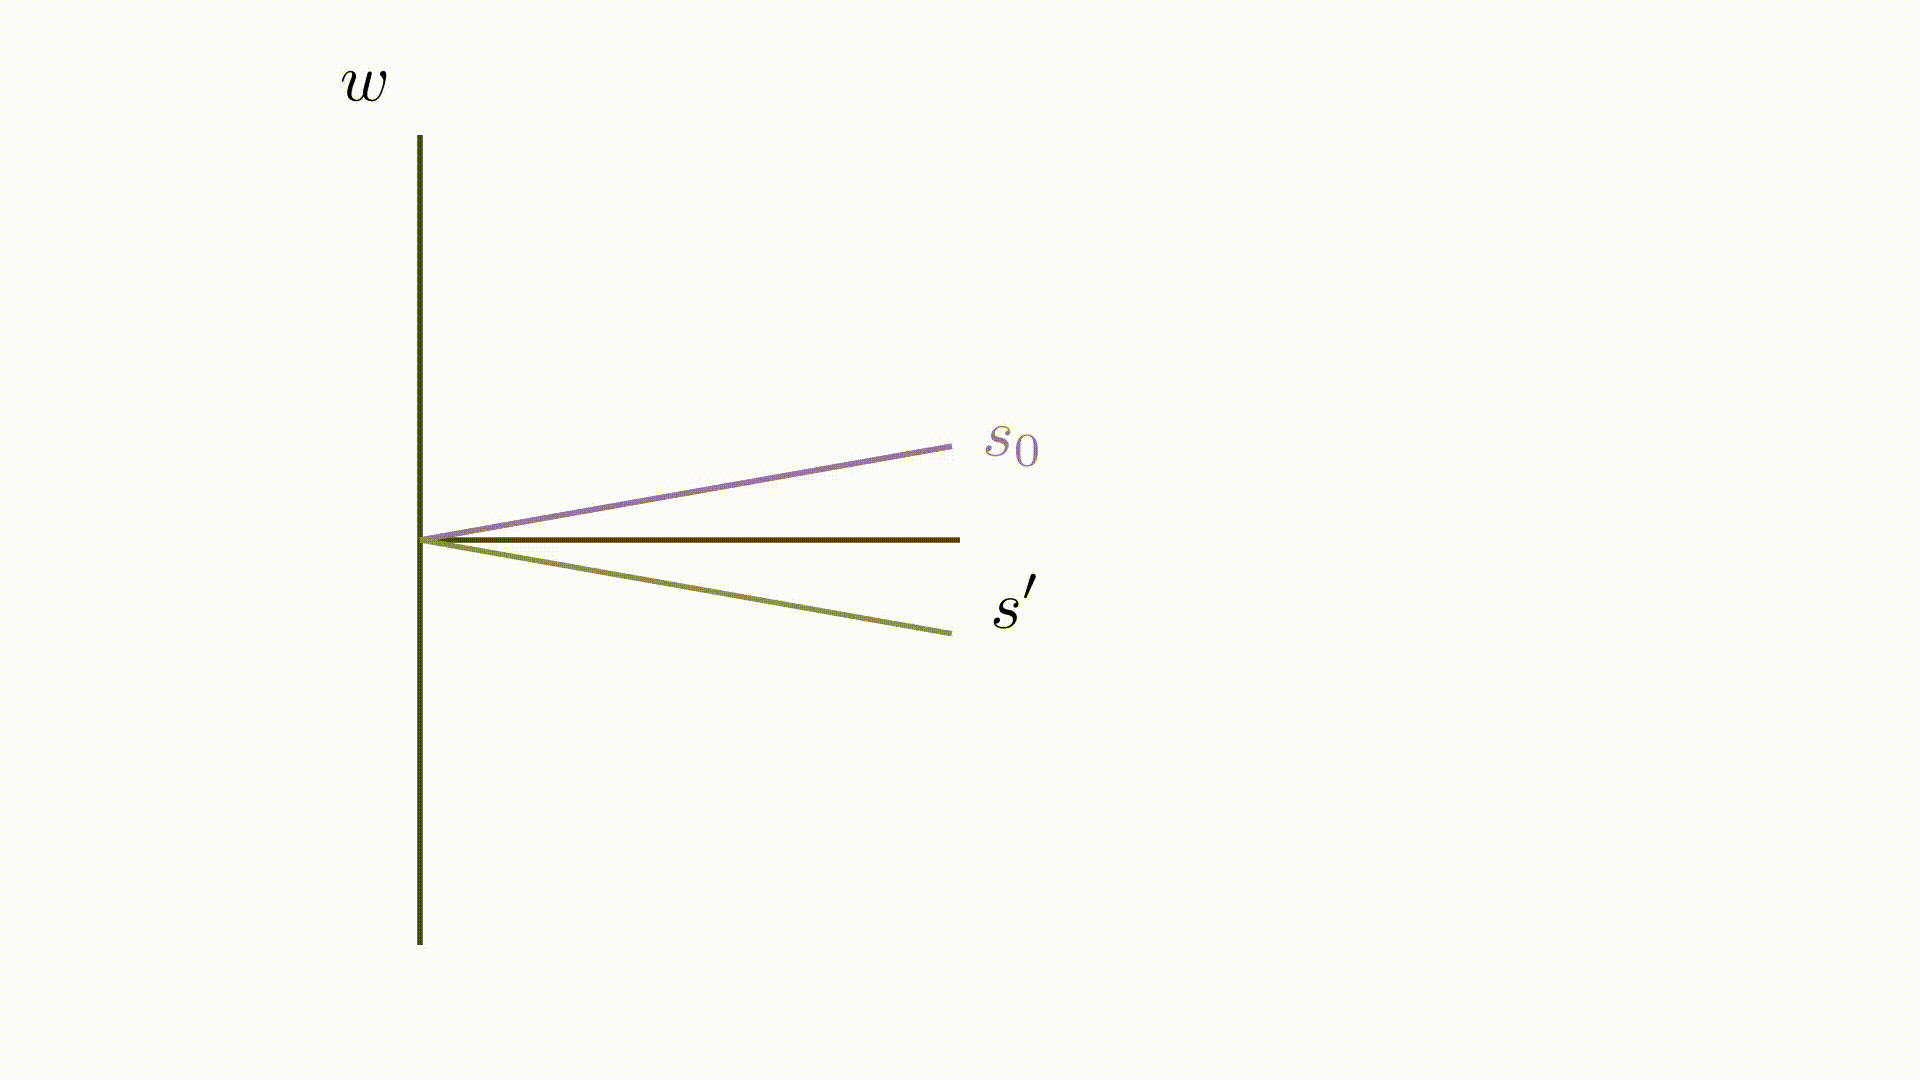

So final circuit for Diffusor is as follows:

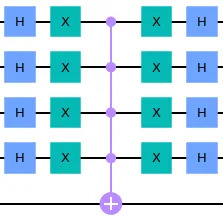

Now let us try to write program for this Diffusor circuit. We will use a seperate function for Diffuser as we used for Oracle.

```python
def Diffuser(circuit,N):
    for i in range(N):
        circuit.h(i)  #take 's' out of superposition
        circuit.x(i)  #flip to |11..> to activate MCX
    circuit.mcx(list(range(N)),N) # apply Phase Kickback
    for i in range(N):
        circuit.x(i)
        circuit.h(i) #undo X Gate and place back into superposition
    
    circuit.barrier()
    return circuit
```

#### Combining Oracle and Diffuser:

The Oracle marks our negative state, the Diffuser increases the probability of measuring it. 

We use that combination, and apply it $(\pi/4)*\sqrt{n}$ times! Then, we measure our Query — multiple times, so we can check what the most probable outcome is. 

And also $n = 2^N$ where N is number of Qubits.

The result we get should be our hidden bit string!

To use $\pi$ and $\sqrt{}$, we’ll quickly import ‘pi’ and ‘sqrt’ from Python’s math library.

```python
from math import pi,sqrt,floor
```

Then construct the for loop, and apply Oracles and Diffusers.

```python
iterations = floor((pi/4)*sqrt(2**N)) #formula for number of iterations
for i in range(iterations):
    circuit = Oracle(circuit,N,hidden_bits)
    circuit = Diffuser(circuit,N) #Amplitude Amplification
```

### Output:

Let’s just add a measurement to each Query qubit.

```python
for i in range(N):
    circuit.measure(i,i) #measure all Query qubits
circuit.draw('mpl')
```

 We are using **dm_simulator** to execute program.

```python
simulator = qiskit.BasicAer.get_backend('dm_simulator') #fetch sim
job = qiskit.execute(circuit,simulator) 
results = job.result()
measurements = results.results[0].data.partial_probability # gets measurements and   
                                    # number of occurrences
# get the result which occurred the most
measurement = max(measurements, key=measurements.get)
```

To verify the results we are adding this part for maintaining readability. This is completely optional.

```python
if measurement == hidden_bits:
    print('Correct!')
    print('The hidden bit string was',str(hidden_bits))
    print('and we measured',str(measurement))
else:
    print('Not quite right. Try checking over your program')
```

We can use the following command to display the circuit.
```python
circuit.draw('mpl')
```

Number of Oracle+Diffuser Combinations : 2
measurements made : {'000': 0.06658935546875, '001': 0.06658935546875, '010': 0.06658935546875, '011': 0.06658935546875, '100': 0.06646728515625, '101': 0.53399658203125, '110': 0.06658935546875, '111': 0.06658935546875}
Hidden bitstring : 101
Maximum Measurement State: 101
Correct!
The hidden bit string was 101
and we measured 101


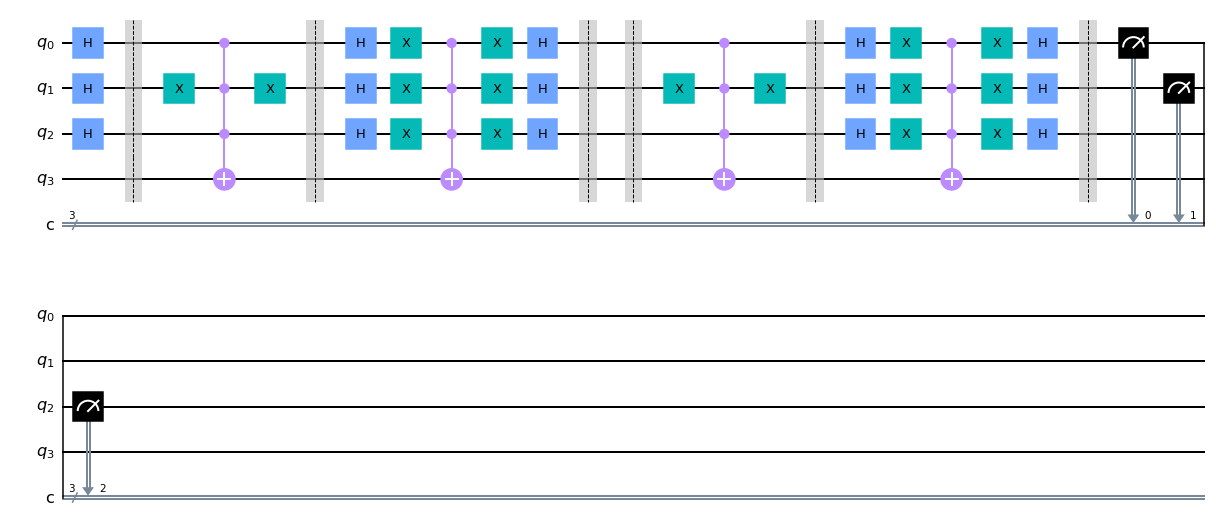

In [5]:
import qiskit
import matplotlib as mpl
from random import randint
from math import pi,sqrt,floor

N = 3    #size of Query and hidden bit string
circuit = qiskit.QuantumCircuit(N+1,N)    # one extra qubit for the   
              # Auxiliary, and a classical bit for each Query qubit

hidden_bits = randint(0,2**N-1) #random n-digit number
hidden_bits = format(hidden_bits,'0'+str(N)+'b') #binary convert

for i in range(N):
    circuit.h(i)

def Oracle(circuit,N,hidden_bits):
    circuit.barrier()
    for i in range(len(hidden_bits)):
        if hidden_bits[i] == '0':
            circuit.x(i) #apply X Gates to ’0’s so they can activate MCX
    circuit.mcx(list(range(N)),N) # check if qubit is perfectly correct
    for i in range(len(hidden_bits)):
        if hidden_bits[i] == '0':
            circuit.x(i)   #finish wrapping X Gates around '0's
    circuit.barrier()
    return circuit

def Diffuser(circuit,N):
    for i in range(N):
        circuit.h(i)  #take 's' out of superposition
        circuit.x(i)  #flip to |11..> to activate MCX
    circuit.mcx(list(range(N)),N) # apply Phase Kickback
    for i in range(N):
        circuit.x(i)
        circuit.h(i) #undo X Gate and place back into superposition
    
    circuit.barrier()
    return circuit

iterations = floor((pi/4)*sqrt(2**N)) #formula for number of iterations
print("Number of Oracle+Diffuser Combinations :",iterations)

for i in range(iterations):
    circuit = Oracle(circuit,N,hidden_bits)
    circuit = Diffuser(circuit,N) #Amplitude Amplification

for i in range(N):
    circuit.measure(i,i) #measure all Query qubits
circuit.draw('mpl')

simulator = qiskit.BasicAer.get_backend('dm_simulator') #fetch sim
job = qiskit.execute(circuit,simulator,shots=1000) #run circuit 1024         
                             #times, to get probability distribution
results = job.result()
measurements = results.results[0].data.partial_probability # gets measurements and   # number of occurrences

print("measurements made :",measurements)

print("Hidden bitstring :",hidden_bits)

# get the result which occurred the most
measurement = max(measurements, key=measurements.get)
print("Maximum Measurement State:",measurement)

if measurement == hidden_bits:
    print('Correct!')
    print('The hidden bit string was',str(hidden_bits))
    print('and we measured',str(measurement))
else:
    print('Not quite right. Try checking over your program')

circuit.draw('mpl')